# Bank Marketing Campaign Analysis: Case Study

Every bank formulates its marketing strategies by understanding its data. They aim to find the target group of people who are more likely to respond positively. Here is the data of a marketing campaign performed by a bank for a term deposit. Below are all the features in the data:

In [1]:
import os
import warnings
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import pickle
import plotly.graph_objects as go
import plotly.express as px 
from sklearn.svm import SVC
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

In [2]:
bank= pd.read_csv(r"C:\Users\Shuhaib\Downloads\shuaib\DATA SET\bank.csv")

In [3]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


]OBJECT TYPE

╔=======================================================╗
║                          JOB                          ║
╚=======================================================╝

╔============================================╗
║ There are 12 unique  values  in JOB column ║
╚============================================╝


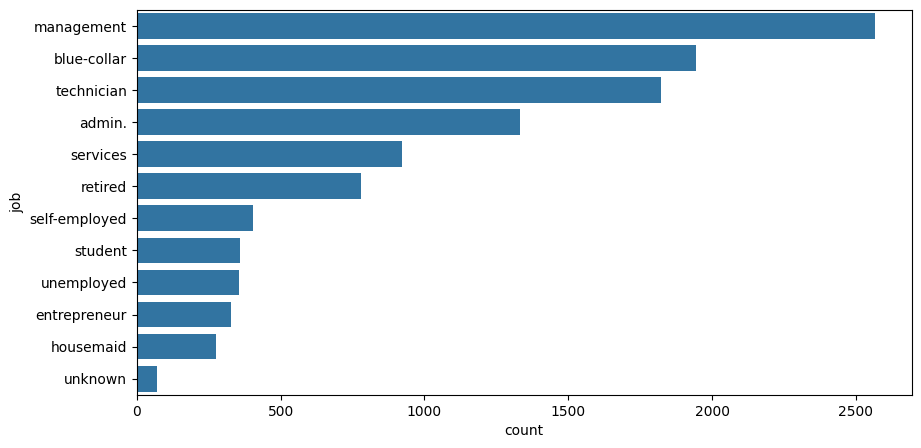


╔===========================================================╗
║                          MARITAL                          ║
╚===========================================================╝

╔===============================================╗
║ There are 3 unique  values  in MARITAL column ║
╚===============================================╝


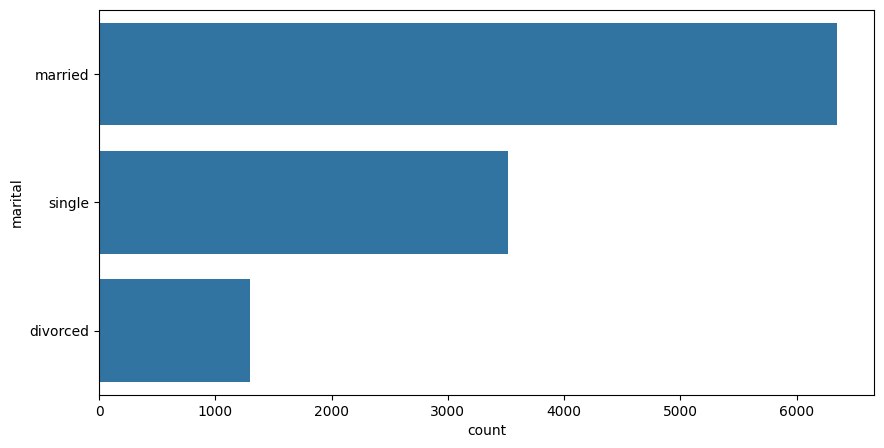


╔=============================================================╗
║                          EDUCATION                          ║
╚=============================================================╝

╔=================================================╗
║ There are 4 unique  values  in EDUCATION column ║
╚=================================================╝


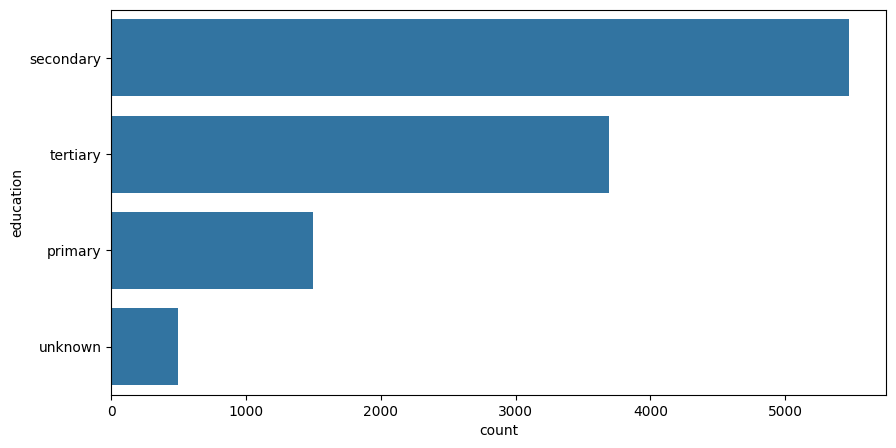


╔===========================================================╗
║                          DEFAULT                          ║
╚===========================================================╝

╔===============================================╗
║ There are 2 unique  values  in DEFAULT column ║
╚===============================================╝


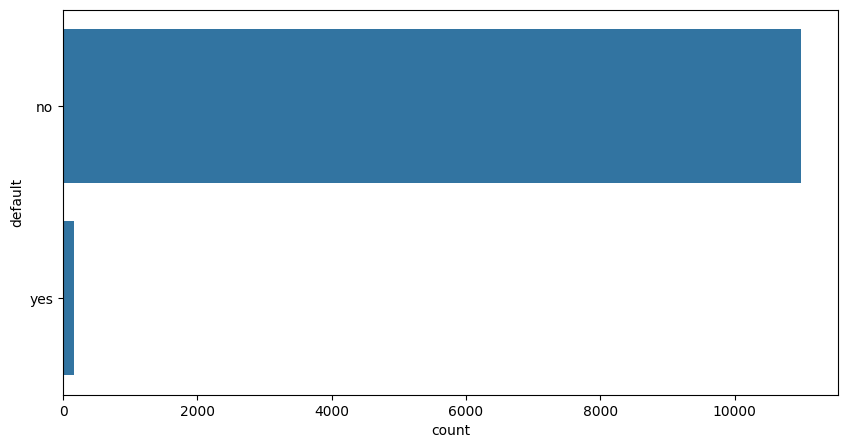


╔===========================================================╗
║                          HOUSING                          ║
╚===========================================================╝

╔===============================================╗
║ There are 2 unique  values  in HOUSING column ║
╚===============================================╝


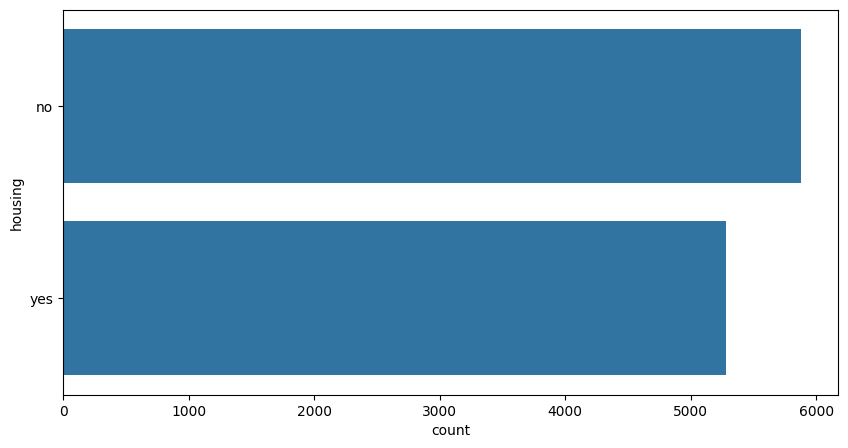


╔========================================================╗
║                          LOAN                          ║
╚========================================================╝

╔============================================╗
║ There are 2 unique  values  in LOAN column ║
╚============================================╝


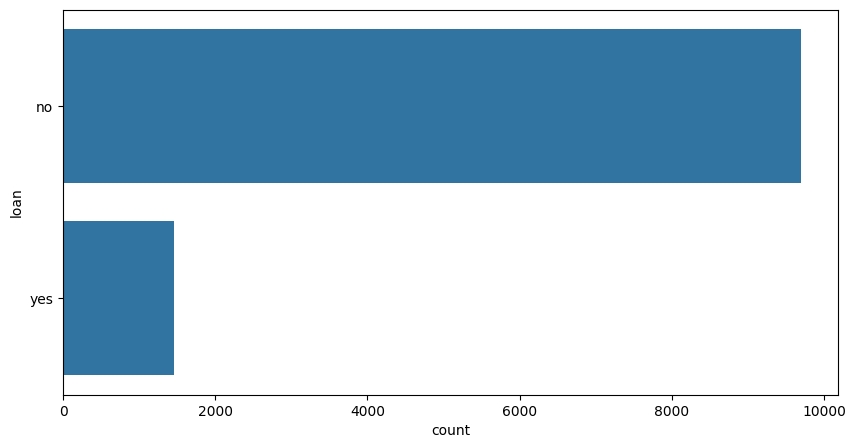


╔===========================================================╗
║                          CONTACT                          ║
╚===========================================================╝

╔===============================================╗
║ There are 3 unique  values  in CONTACT column ║
╚===============================================╝


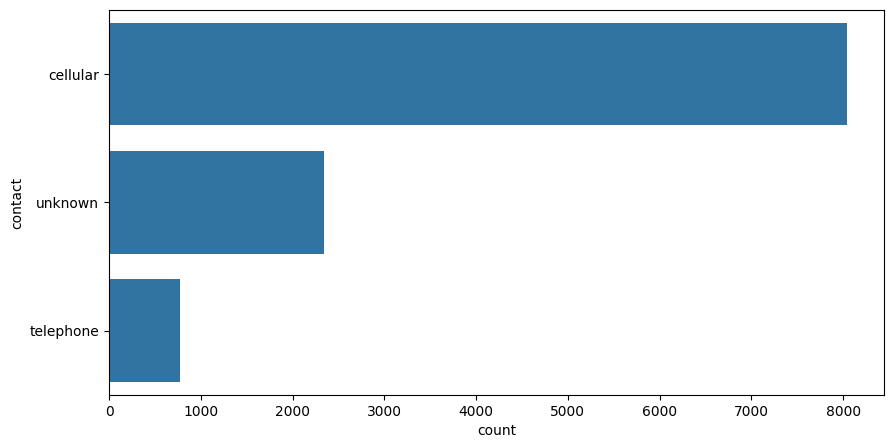


╔=========================================================╗
║                          MONTH                          ║
╚=========================================================╝

╔==============================================╗
║ There are 12 unique  values  in MONTH column ║
╚==============================================╝


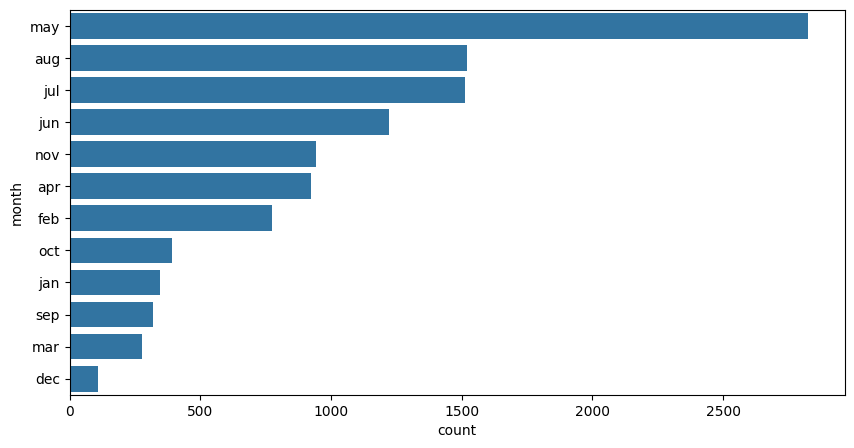


╔============================================================╗
║                          POUTCOME                          ║
╚============================================================╝

╔================================================╗
║ There are 4 unique  values  in POUTCOME column ║
╚================================================╝


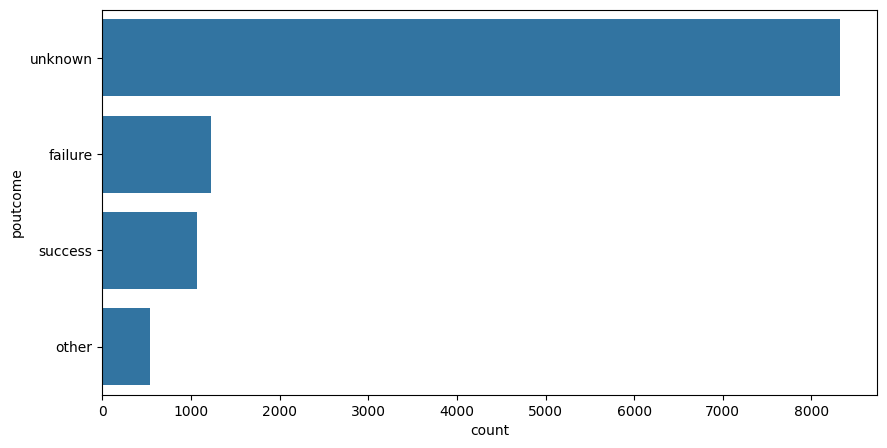


╔===========================================================╗
║                          DEPOSIT                          ║
╚===========================================================╝

╔===============================================╗
║ There are 2 unique  values  in DEPOSIT column ║
╚===============================================╝


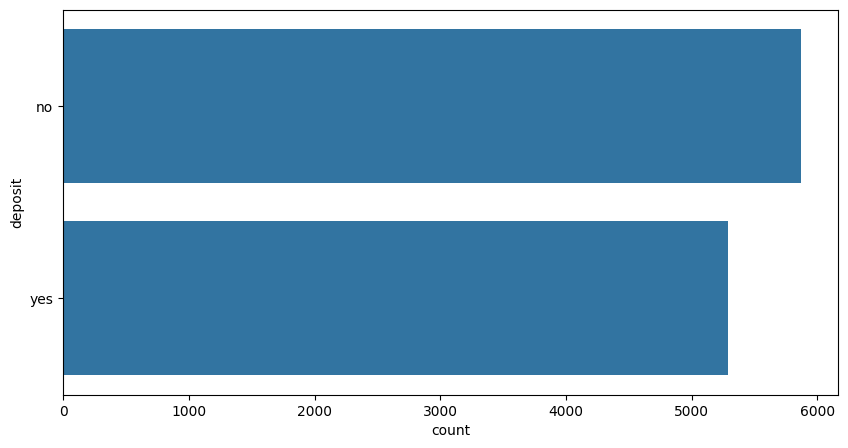

INT TYPE

╔=======================================================╗
║                          AGE                          ║
╚=======================================================╝

╔=======================================╗
║ Average value is : 41.231947679627304 ║
╚=======================================╝

╔=======================╗
║ minimum value is : 18 ║
╚=======================╝

╔=======================╗
║ Maximum value is : 95 ║
╚=======================╝

╔============================================╗
║ Normal distributed Data Located below mean ║
╚============================================╝
None



╔===========================================================╗
║                          BALANCE                          ║
╚===========================================================╝

╔=======================================╗
║ Average value is : 1528.5385235620856 ║
╚=======================================╝

╔==========================╗
║ minimum value is : -6847 ║
╚==========================╝

╔==========================╗
║ Maximum value is : 81204 ║
╚==========================╝

╔============================================╗
║ Normal distributed Data Located above mean ║
╚============================================╝
None



╔=======================================================╗
║                          DAY                          ║
╚=======================================================╝

╔=======================================╗
║ Average value is : 15.658036194230425 ║
╚=======================================╝

╔======================╗
║ minimum value is : 1 ║
╚======================╝

╔=======================╗
║ Maximum value is : 31 ║
╚=======================╝

╔============================================╗
║ Normal distributed Data Located below mean ║
╚============================================╝
None



╔============================================================╗
║                          DURATION                          ║
╚============================================================╝

╔=======================================╗
║ Average value is : 371.99381831213043 ║
╚=======================================╝

╔======================╗
║ minimum value is : 2 ║
╚======================╝

╔=========================╗
║ Maximum value is : 3881 ║
╚=========================╝

╔============================================╗
║ Normal distributed Data Located below mean ║
╚============================================╝
None



╔============================================================╗
║                          CAMPAIGN                          ║
╚============================================================╝

╔======================================╗
║ Average value is : 2.508421429851281 ║
╚======================================╝

╔======================╗
║ minimum value is : 1 ║
╚======================╝

╔=======================╗
║ Maximum value is : 63 ║
╚=======================╝

╔============================================╗
║ Normal distributed Data Located above mean ║
╚============================================╝
None



╔=========================================================╗
║                          PDAYS                          ║
╚=========================================================╝

╔======================================╗
║ Average value is : 51.33040673714388 ║
╚======================================╝

╔=======================╗
║ minimum value is : -1 ║
╚=======================╝

╔========================╗
║ Maximum value is : 854 ║
╚========================╝

╔============================================╗
║ Normal distributed Data Located above mean ║
╚============================================╝
None



╔============================================================╗
║                          PREVIOUS                          ║
╚============================================================╝

╔=======================================╗
║ Average value is : 0.8325568894463358 ║
╚=======================================╝

╔======================╗
║ minimum value is : 0 ║
╚======================╝

╔=======================╗
║ Maximum value is : 58 ║
╚=======================╝

╔============================================╗
║ Normal distributed Data Located above mean ║
╚============================================╝
None


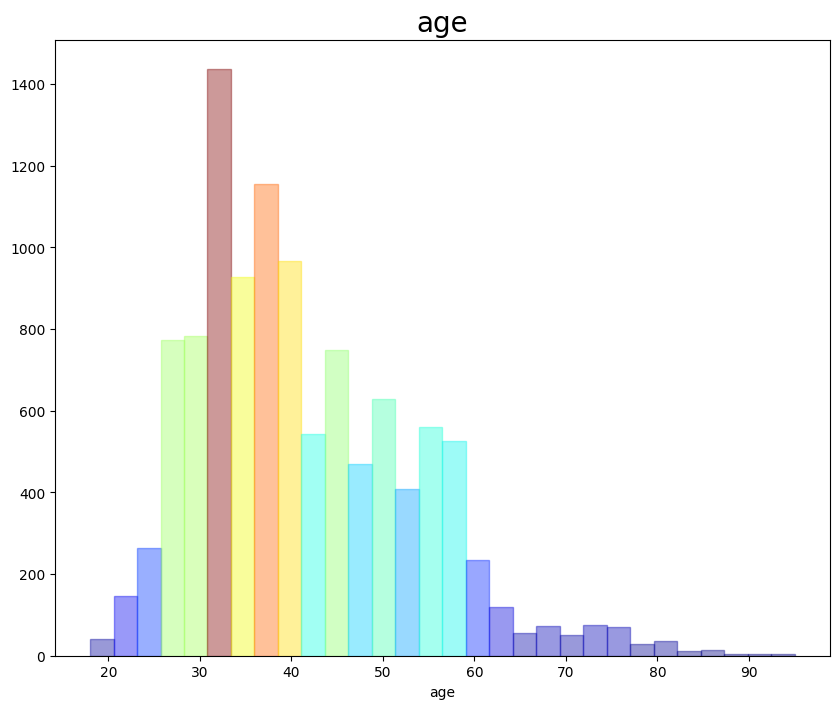

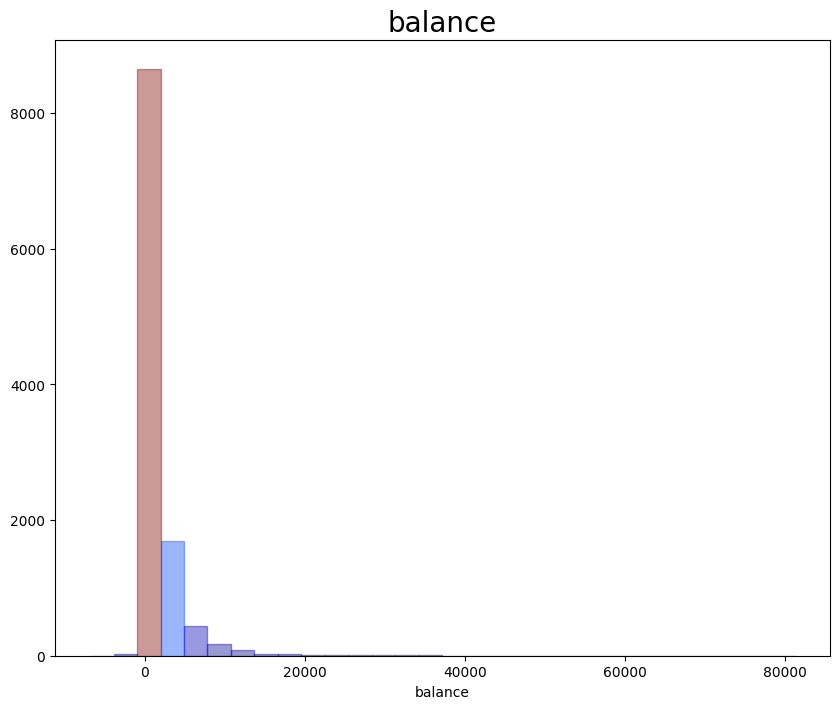

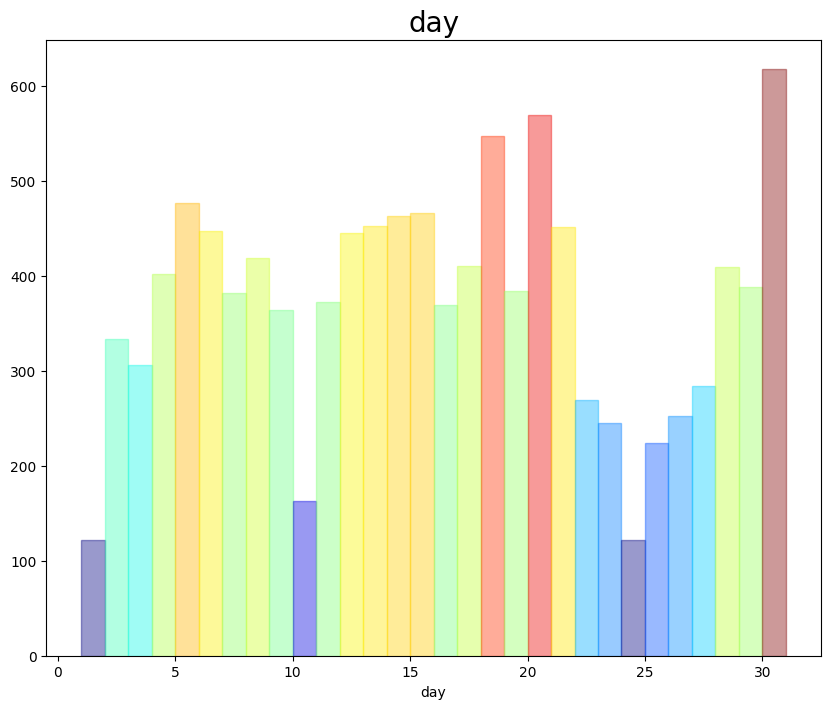

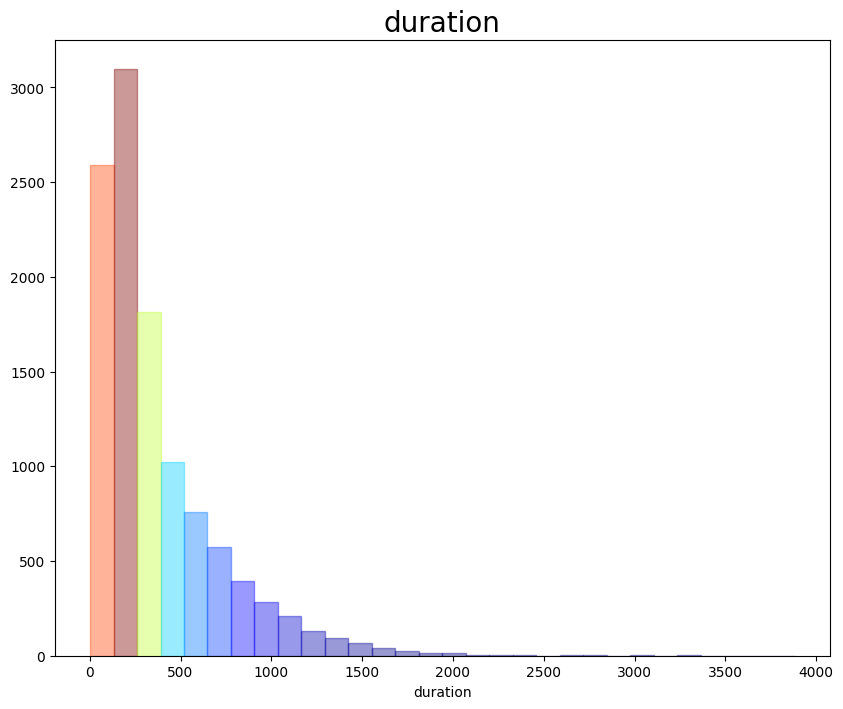

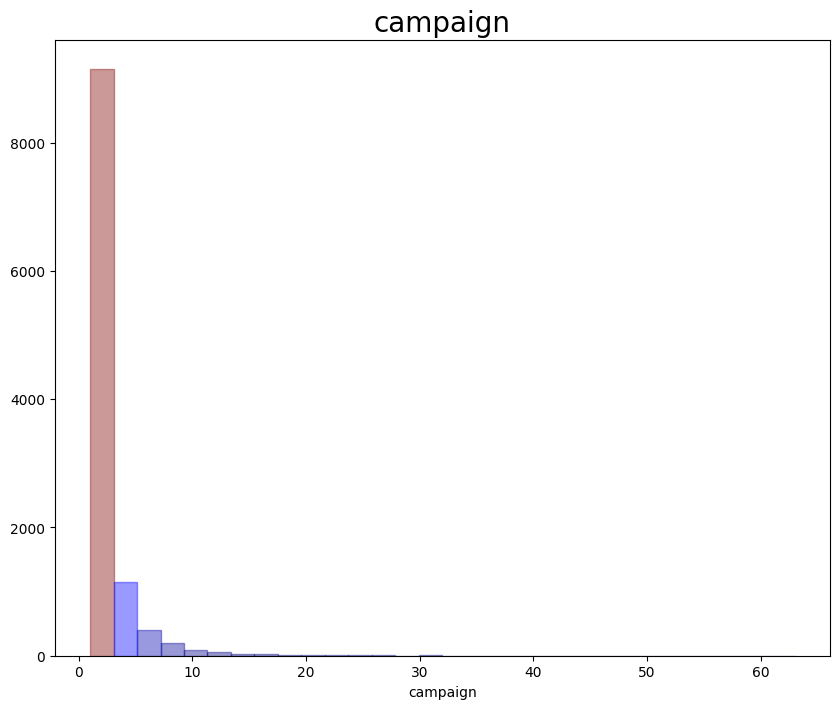

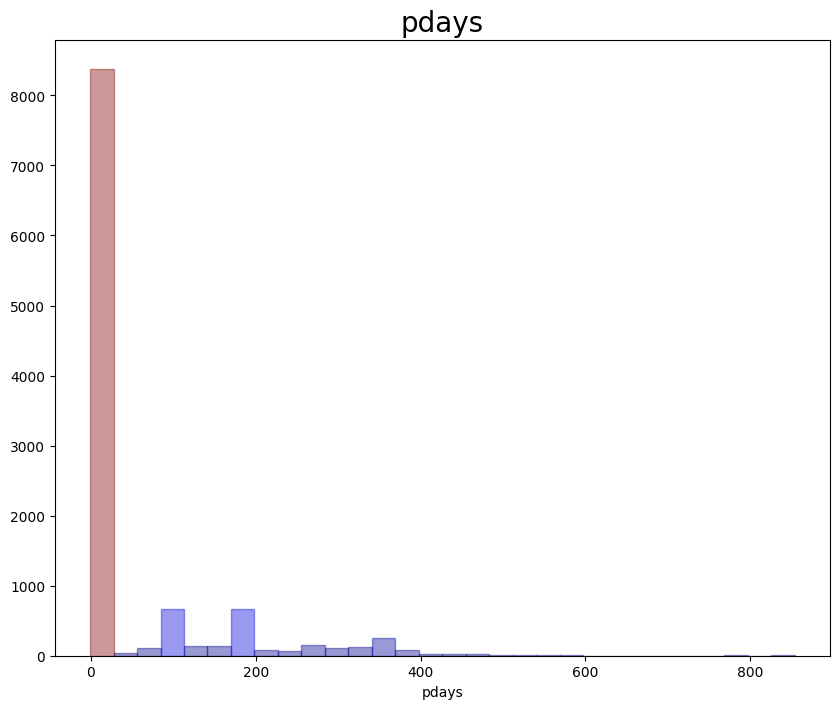

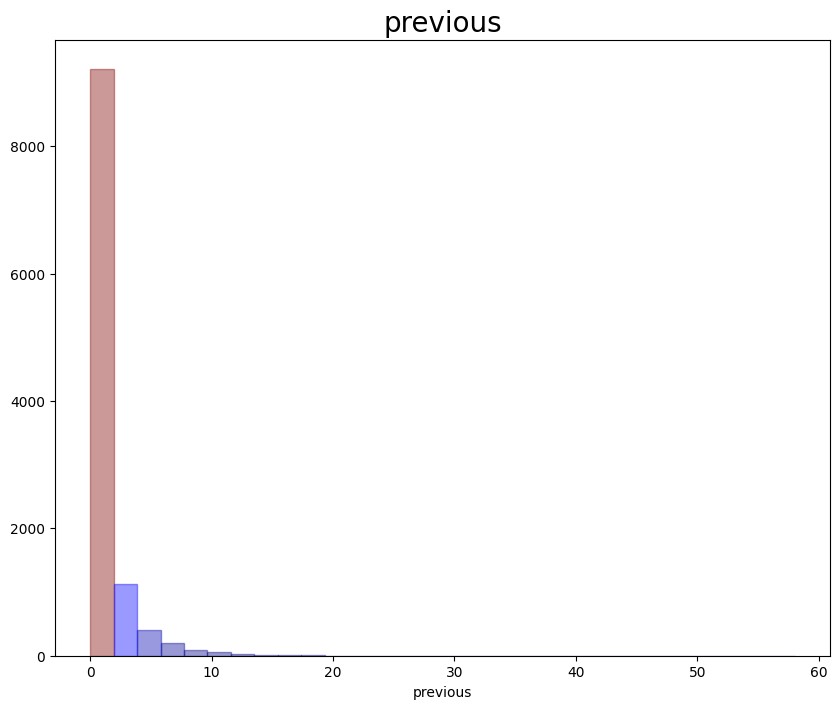

In [4]:
class Eda:
    def row(self,data):
        fig= make_subplots(rows=1, cols=2)
        fig.add_trace(go.Indicator(mode ='number',value= data.shape[0],number={'font':{'color':'#E58F65','size':100}},title={'text':"Rows<br><span style='font-size:0.8em;color:gray'>In the Datafrane</span>"},domain={'x':[0,0.5],'y':[0.6,1]}))
        fig.add_trace(go.Indicator(mode ='number',value =data.shape[1],number={'font':{'color':'#E58F65','size':100}},title={"text":"Coolums<br><span style='font-size:0.8em;color:gray'>In the DataFrame</span>"}, domain={'x':[0.5,1],'y':[0,0.4]}))
        fig.show()
    def border_msg(self,msg,indent=1,width=None,title=None):
        lines = msg.split('\n')
        space =" " *indent
        if not width:
            width =max(map(len,lines))
        box = f'╔{"="*(width +indent *2)}╗\n'
        if title:
            box += f'║{space}{title:<{width}}{space}║\n'
            box += f'║{space}{"-"*len(title):<{width}}{space}║\n'
        box += ''.join([f'║{space}{line:<{width}}{space}║\n'for line in lines])
        box +=f'╚{"="*(width +indent *2)}╝'
        print('\033[92m'+'\033[1m')
        print(box)
    def distribution(self,x,title):
        plt.figure(figsize=(10,8))
        ax =sns.distplot(x,kde =False,bins=30)
        values =np.array([rec.get_height() for rec in ax.patches])
        norm = plt.Normalize(values.min(),values.max())
        colors =plt.cm.jet(norm(values))
        for rec,col in zip(ax.patches,colors):
            rec.set_color(col)
        plt.title(title,size=20,color='black')
    def run(self,bank):
        self.row(bank)
        if len(bank)>0:
            object_bank = bank.select_dtypes('object').columns.tolist()
            int_bank = bank.select_dtypes('int').columns.tolist()
            bool_bank =bank.select_dtypes('bool').columns.tolist()
            float_bank = bank.select_dtypes('float').columns.tolist()
            
            if len(object_bank)>0:
                print('\033[1m]'+"OBJECT TYPE")
                for col in object_bank:
                    self.border_msg(' '*25+ col.upper()+' '*25)
                    self.border_msg('There are {} unique  values  in {} column'.format(bank[col].nunique(),col.upper()))
                    plt.figure(figsize=(10,5))
                    sns.countplot(y=col,data=bank,order=bank[col].value_counts().index)
                    plt.show()
            if len(int_bank)>0:
                print('\033[1m'+"INT TYPE")
                for col in int_bank:
                    self.border_msg(' '*25+col.upper()+' '*25)
                    self.border_msg('Average value is : {}'.format(bank[col].mean()))
                    self.border_msg('minimum value is : {}'.format(bank[col].min()))
                    self.border_msg('Maximum value is : {}'.format(bank[col].max()))
                    self.distribution(bank[col],title= col)
                    if bank[col].mean()>bank[col].std():
                        print(self.border_msg("Normal distributed Data Located below mean"))
                    elif bank[col].mean()<bank[col].std():
                        print(self.border_msg("Normal distributed Data Located above mean"))
                    else:
                        self.border_msg("Mean Equals Std Dev - Distribution is normal")
                    fig = make_subplots(rows=1,cols=2)
                    fig.add_trace(go.Indicator(mode="number",value = bank[col].mean(),number={'font':{'color':'#E58F65','size':100}},title ={"text":"Mean<br><span style='font-size:0.8em;color:gray'></span>"},domain={'x':[0,0.5],'y':[0.6,1]}))
                    fig.add_trace(go.Indicator(mode="number",value = bank[col].std(),number={'font':{'color':'#E58F65','size':100}},title ={"text":"Standart dev<br><span style='font-size:0.8em;color:gray'></span>"},domain={'x':[0.5,1],'y':[0,0.4]}))
                    fig.show()
            if len(bool_bank)>0:
                print('\033[1m'+"BOOL TYPE")
                for col in bool_bank:
                    self.border_msg(' '*25+col.upper()+' '*25)
                    self.figure(figsize=(10,5))
                    sns.countplot(y =col,data =bank,order =bank[col].value_counts().index)
                    plt.show()
            if len(float_bank)>0:
                print('\033[1m]'+'FLOAT TYPE')
                for col in float_bank:
                    for col in int_bank:
                        self.distribution(bank[col],title=col)
                        if bank[col].mean()>bank[col].std():
                            print(self.border_msg("Normal distributed Data Located below mean"))
                        elif bank[col].mean()<bank[col].std():
                            print(self.border_msg("Normal distribution Data Located above mean"))
                        else:
                            self.border_msg("Mean Equals std DEv - Distribution is Normal")
frame = Eda().run(bank)

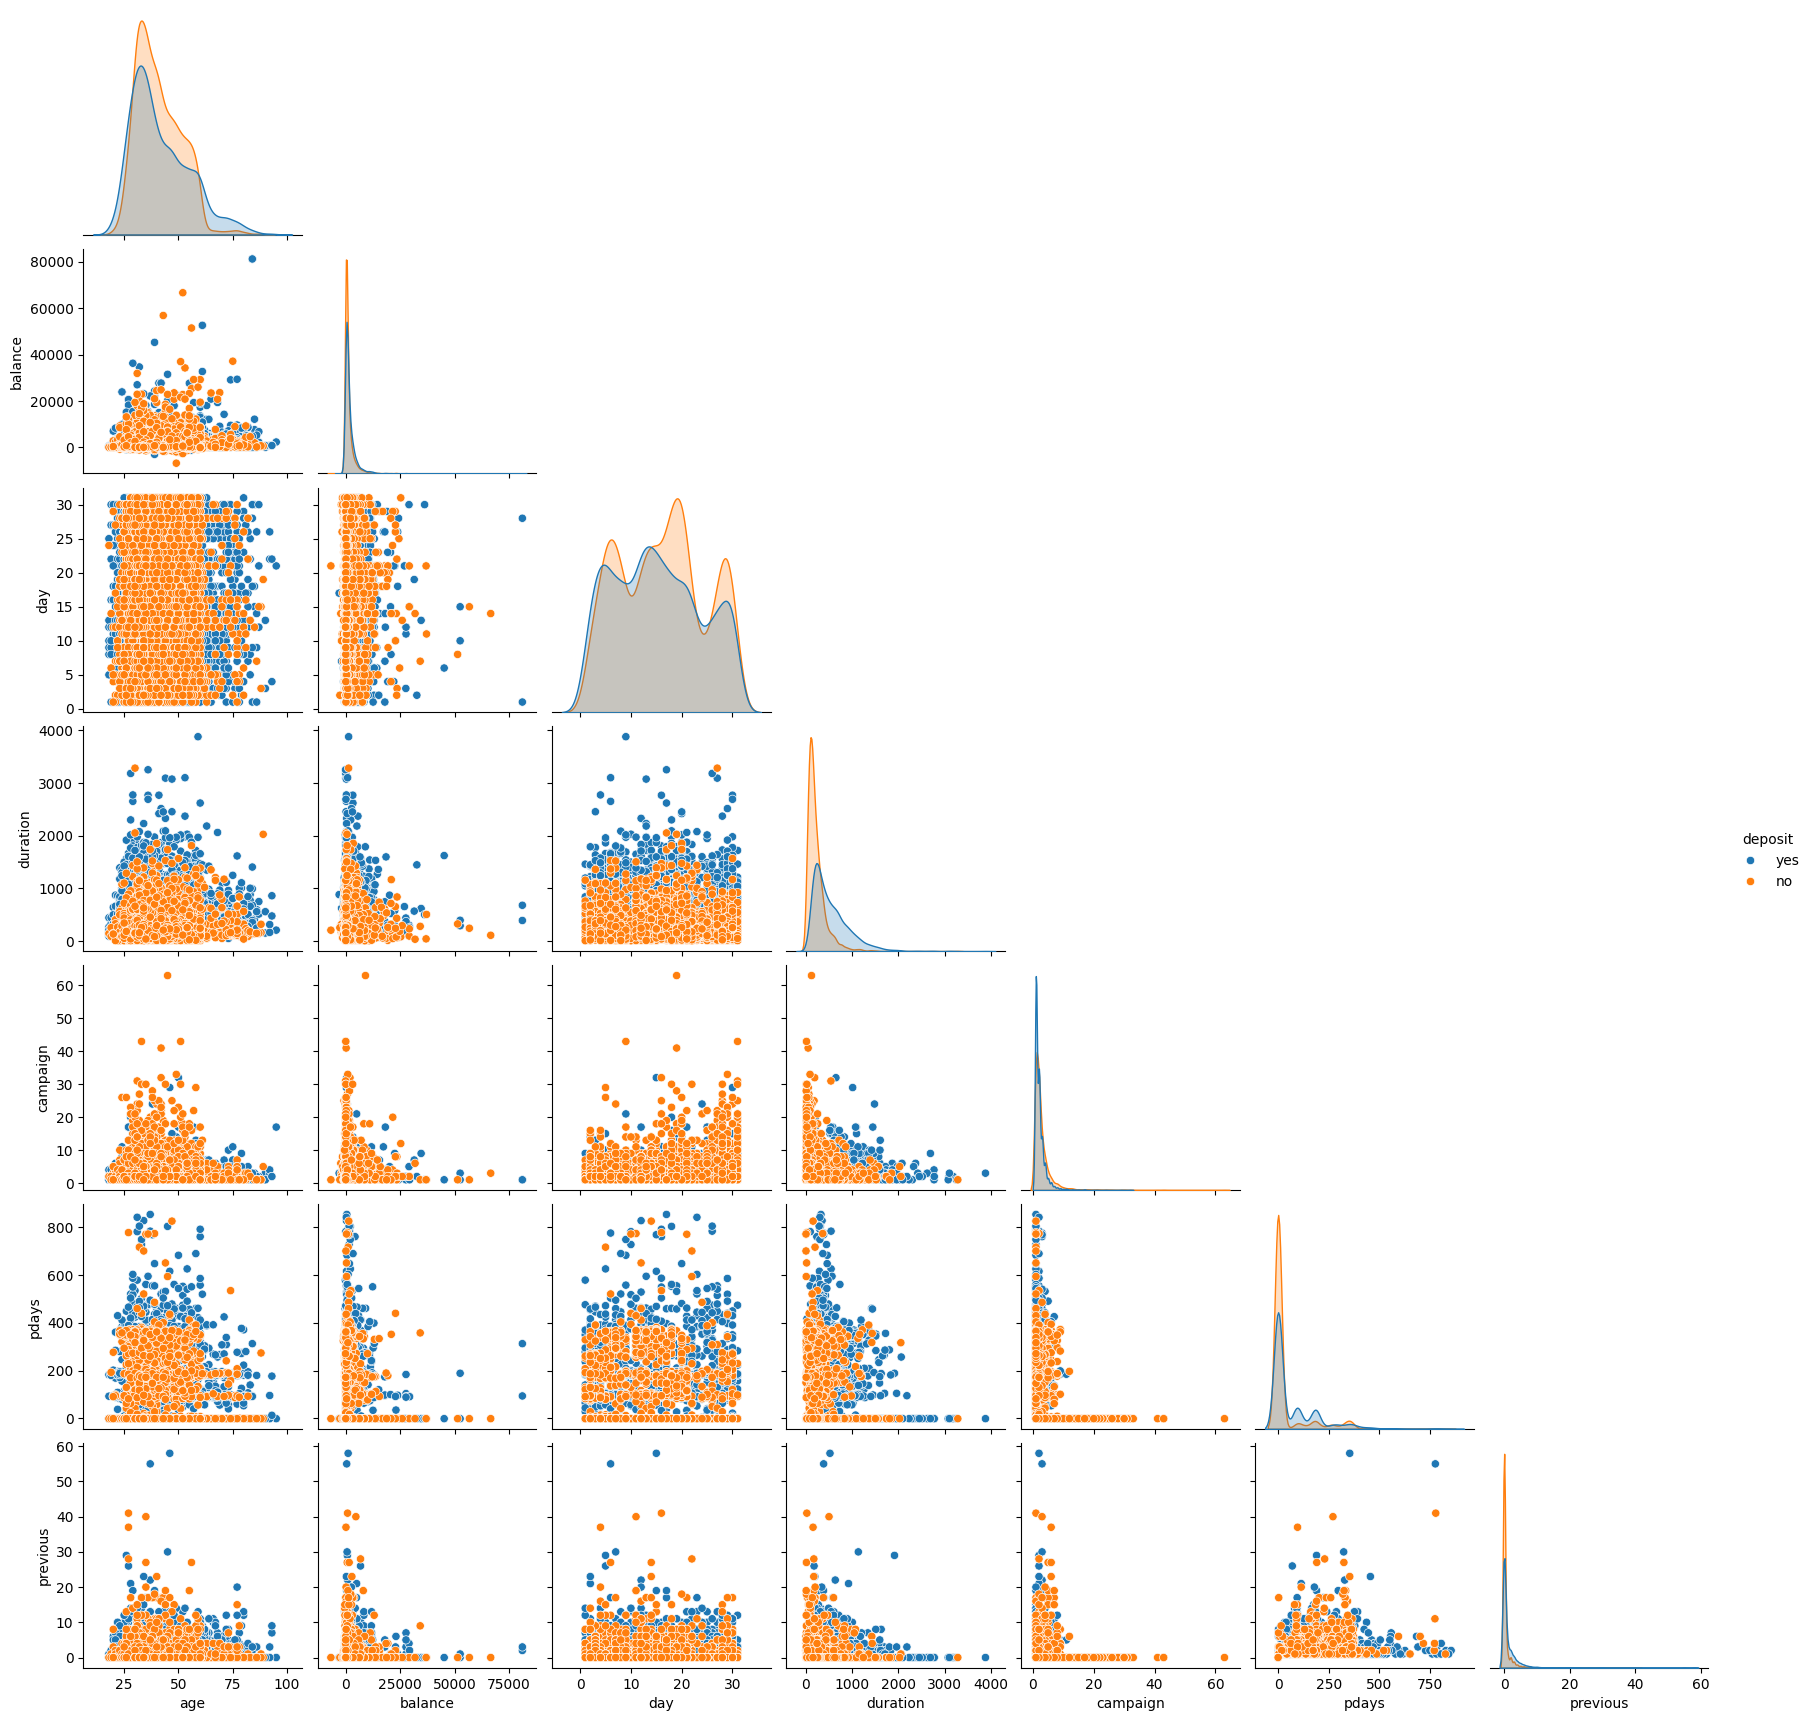

In [5]:
sns.pairplot(bank,hue='deposit',corner=True)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'job'),
  Text(0, 2.5, 'marital'),
  Text(0, 3.5, 'education'),
  Text(0, 4.5, 'default'),
  Text(0, 5.5, 'balance'),
  Text(0, 6.5, 'housing'),
  Text(0, 7.5, 'loan'),
  Text(0, 8.5, 'contact'),
  Text(0, 9.5, 'day'),
  Text(0, 10.5, 'month'),
  Text(0, 11.5, 'duration'),
  Text(0, 12.5, 'campaign'),
  Text(0, 13.5, 'pdays'),
  Text(0, 14.5, 'previous'),
  Text(0, 15.5, 'poutcome'),
  Text(0, 16.5, 'deposit')])

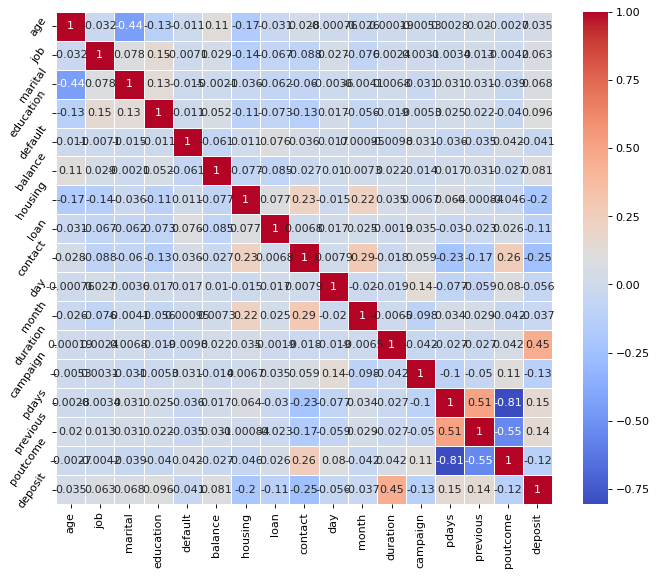

In [6]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numerical using Label Encoding
label_encoders = {}
for col in bank.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    bank[col] = label_encoders[col].fit_transform(bank[col])
plt.figure(figsize=(10,8),dpi=80)
sns.heatmap(bank.corr(),cmap="coolwarm",annot=True,linewidth=0.5)
plt.yticks(rotation=55)

Which occupation has most active balance?

In [7]:
sample = bank.rename(columns={"balance":"Active Balance","job":"Occupation"})
fig =px.treemap(sample,path=[px.Constant('Active Balance'),'Occupation'],values='Active Balance',hover_data = ['Occupation'])
fig.show()

We agree that most active balance and most deposit account mostly are managemnet. Does martial status has impact on deposit ?¶

In [8]:
management = bank[bank.job=='management']
fig = px.box(management,x="marital",y="balance",color="deposit",points="all")
fig.update_traces(quartilemethod="exclusive")
fig.update_layout(title ={
    'text': "Management behevior on deposit",
    'y':0.95,
    'x':0.5,
    'xanchor': 'center',
    'yanchor':'top'},
xaxis_title ="Marital Status",
yaxis_title ="Active Balance",
legend_title = "deposit Status",
font=dict(
    family="Arial",
    size=18,
    color="DarkBlue"
)
)
fig.update_layout(xaxis=dict(showgrid=False),yaxis=dict(showgrid=False))
fig.show()

In [9]:
technician = bank[bank.job== 'technician']
fig =px.box(technician,x='marital',y="balance",color='deposit',points='all')
fig.update_traces(quartilemethod='exclusive')
fig.update_layout(
    title={
        'text':"Technician behvior on deposit",
        'y':0.95,
        'x':0.5,
        'xanchor':'center',
        'yanchor':'top'
    },
    xaxis_title ="Marital Status",
    yaxis_title="Active Balance",
    legend_title ="Deposit Status",
    font=dict(
        family="Arial",
        size=18,
        color = "DarkBlue"
    )
)
fig.update_layout(xaxis=dict(showgrid=False),yaxis=dict(showgrid=False))
fig.show()

In [10]:

fig.update_layout(xaxis=dict(showgrid=False),
              yaxis=dict(showgrid=False)
)
fig.show()